In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
#df = pd.read_csv("C:/Users/neeth/Downloads/default_of_credit_card_clients.xls")
df = pd.read_csv("/content/default_of_credit_card_clients.csv")
#df = pd.read_csv("filename.csv", on_bad_lines='skip')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
skewness =df.skew()
skewness

,0
ID,0.000000
LIMIT_BAL,0.992867
SEX,-0.424183
EDUCATION,0.970972
MARRIAGE,-0.018742
AGE,0.732246
PAY_0,0.731975
PAY_2,0.790565
PAY_3,0.840682
PAY_4,0.999629


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['default payment next month'],axis=1)
y = df['default payment next month']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from scipy.stats import zscore
for col in X.columns:
    zscores = np.abs(zscore(X[col]))
    out_liers = X[zscores>3]
    print(out_liers[col])

Series([], Name: ID, dtype: int64)
12       630000
433      580000
451      600000
527      620000
555      630000
          ...  
29571    570000
29740    620000
29861    650000
29886    630000
29963    610000
Name: LIMIT_BAL, Length: 130, dtype: int64
Series([], Name: SEX, dtype: int64)
47       5
69       5
385      5
502      6
504      6
        ..
29811    5
29836    6
29839    5
29920    5
29966    5
Name: EDUCATION, Length: 331, dtype: int64
Series([], Name: MARRIAGE, dtype: int64)
246      75
387      73
1029     67
1058     67
1073     66
         ..
29149    67
29163    73
29173    64
29175    74
29179    73
Name: AGE, Length: 141, dtype: int64
360      4
362      4
649      8
749      8
801      4
        ..
29651    5
29668    4
29744    4
29814    5
29997    4
Name: PAY_0, Length: 141, dtype: int64
189      5
649      7
749      7
831      7
848      4
        ..
29651    4
29668    4
29771    4
29814    4
29816    4
Name: PAY_2, Length: 157, dtype: int64
158      4
189  

In [ ]:
df["default payment next month"].value_counts()

,count
default payment next month,
0,23364
1,6636


80-95

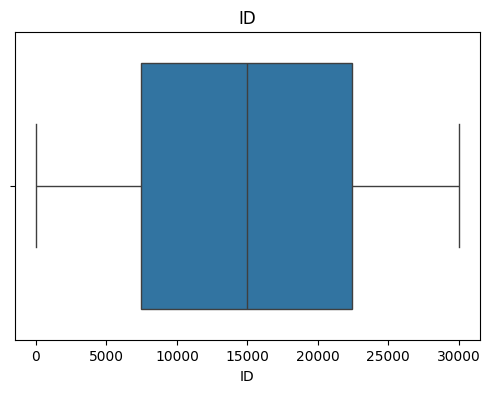

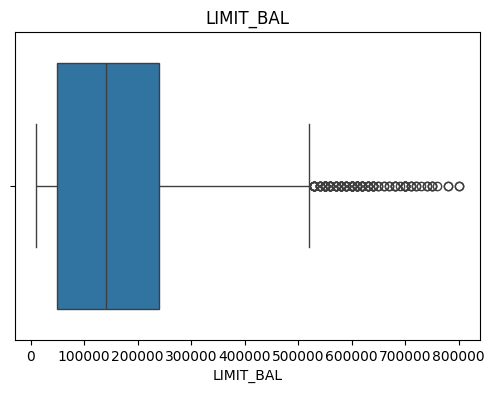

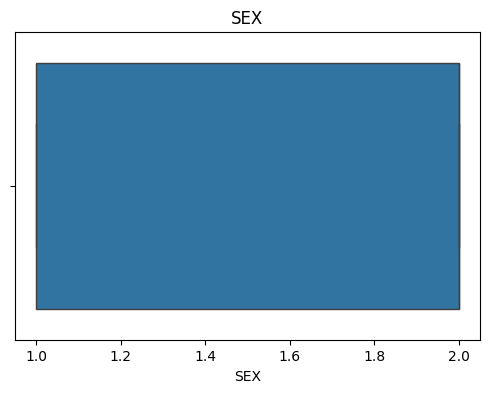

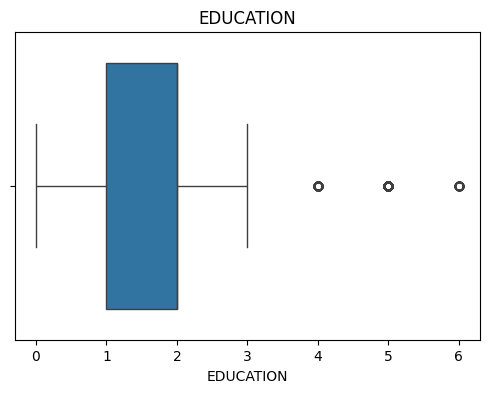

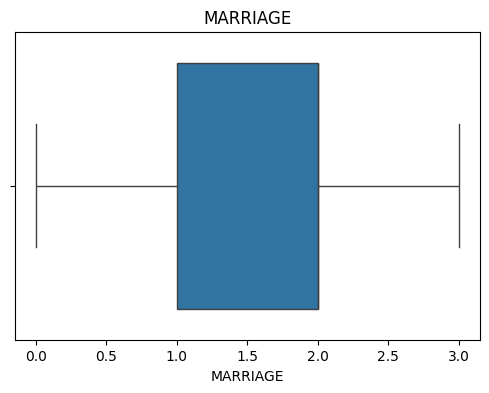

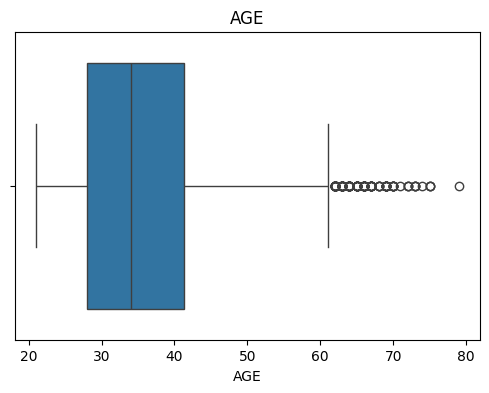

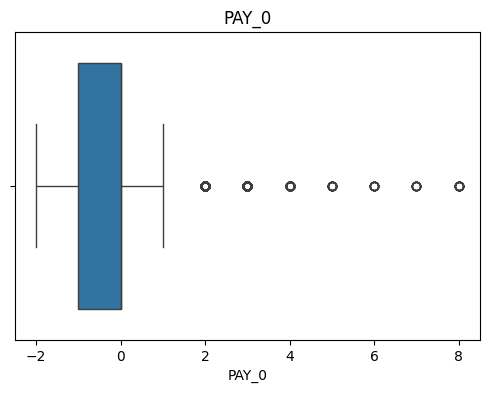

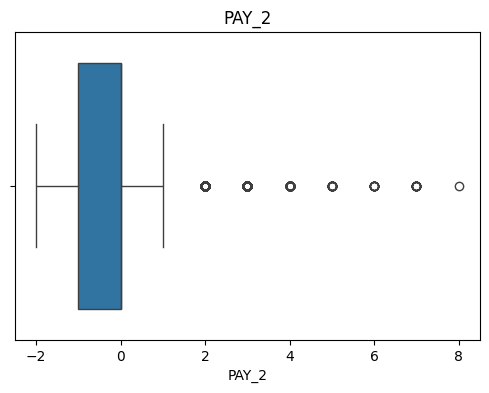

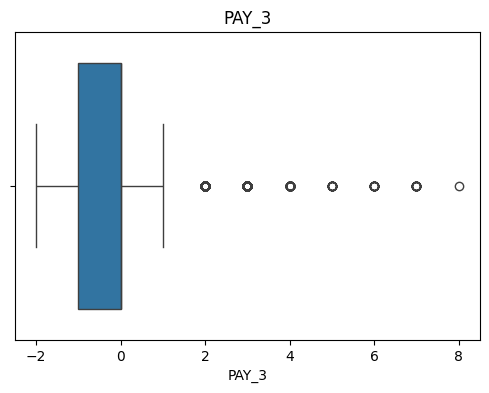

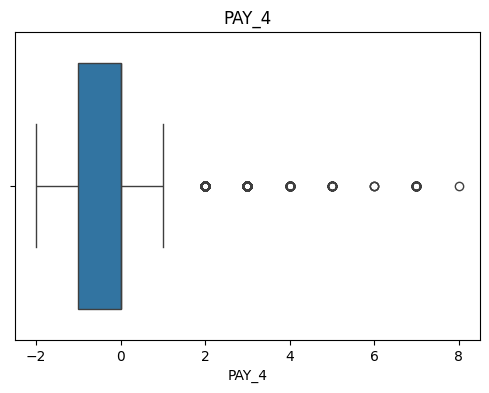

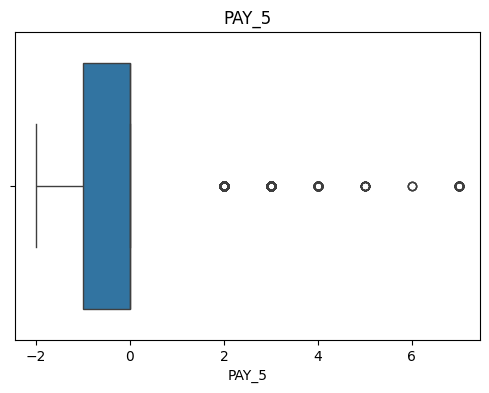

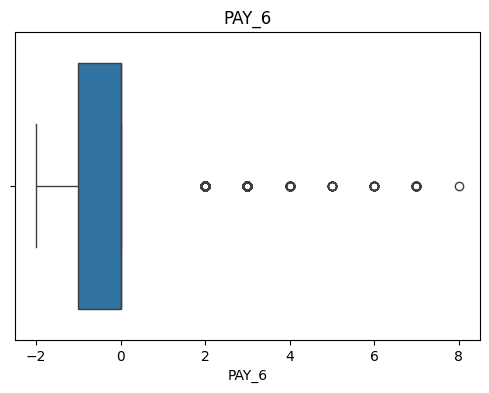

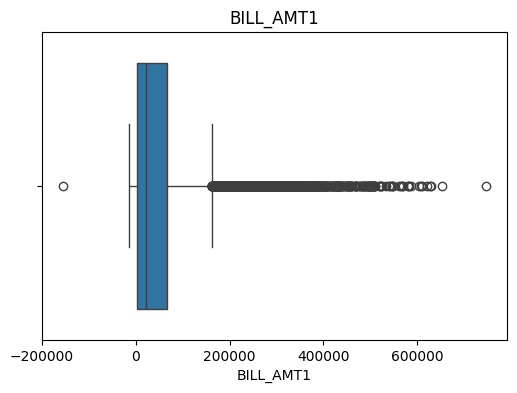

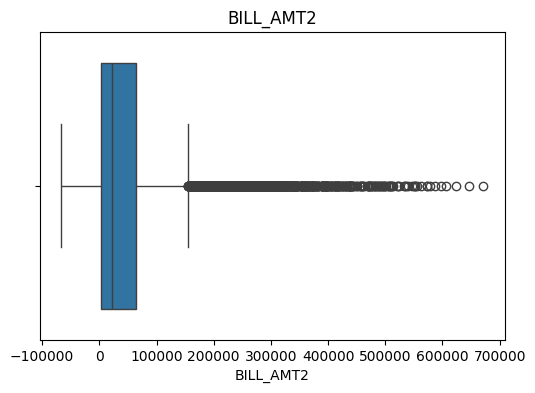

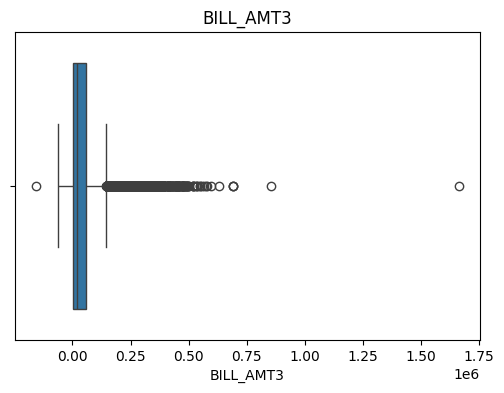

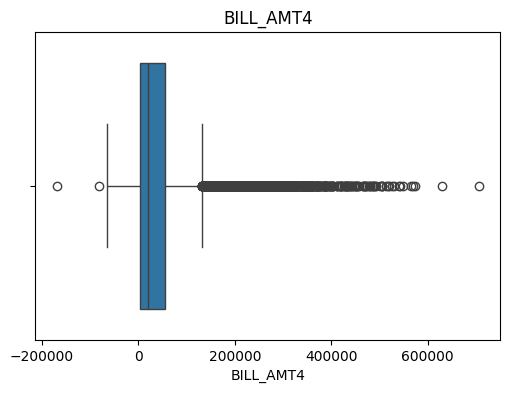

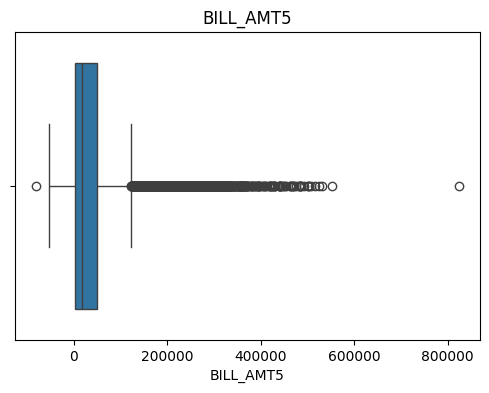

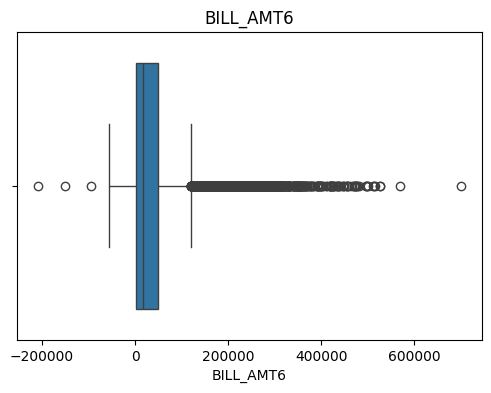

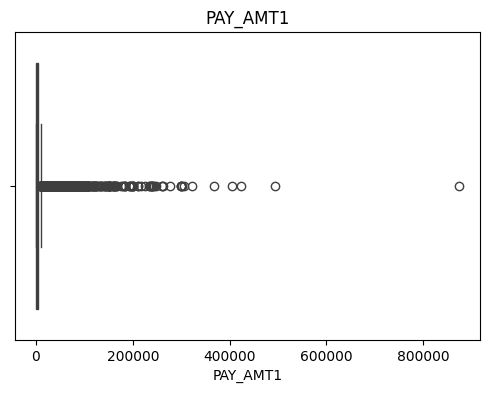

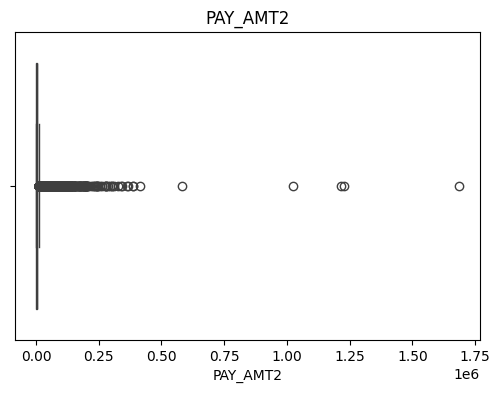

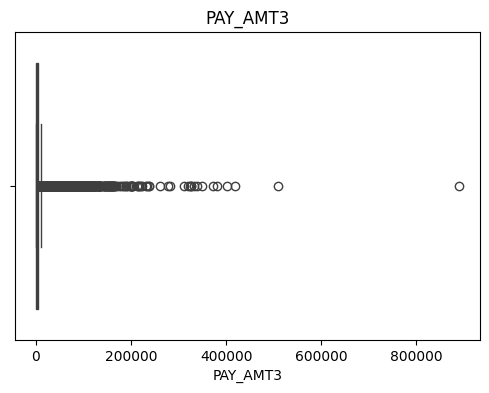

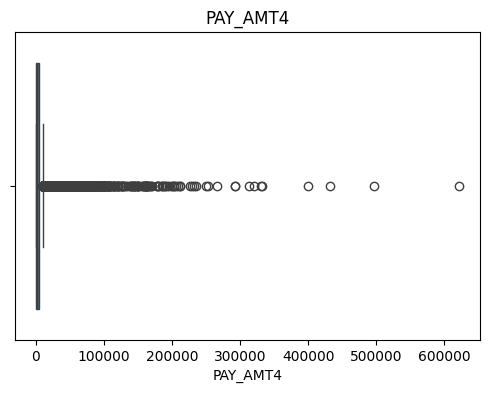

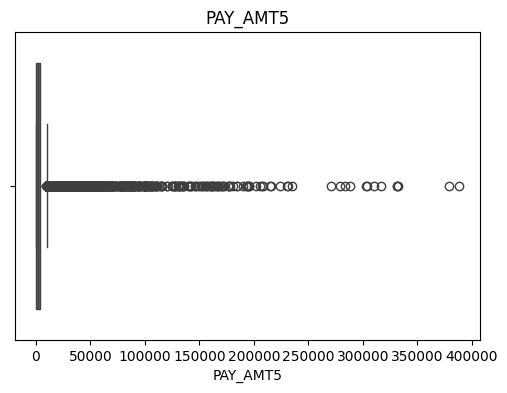

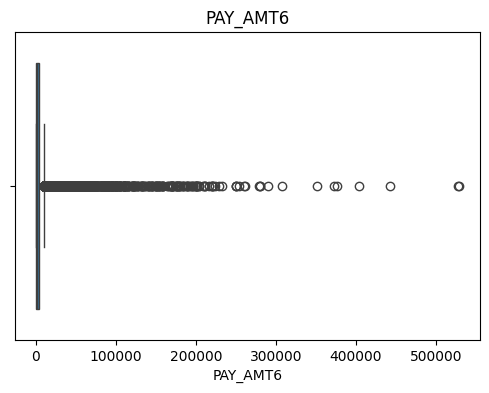

In [ ]:
import matplotlib.pyplot as plt
for col in X_train.columns:
   plt.figure(figsize=(6, 4))
   sns.boxplot(x=X_train[col])
   plt.title(col)
   plt.show()

In [ ]:
from sklearn.preprocessing import robust_scale
X_train_scaled = robust_scale(X_train)
X_test_scaled = robust_scale(X_test)
#X_train_scaled

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr = lr.predict(X_test_scaled)
accuracy = accuracy_score(y_pred_lr,y_test)
accuracy

0.8056666666666666

In [ ]:
from sklearn.model_selection import RandomizedSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
ds_tree = DecisionTreeClassifier()
ds_tree.fit(X_train,y_train)
y_pred = ds_tree.predict(X_test)
accuracy_dt =accuracy_score(y_pred,y_test)
print("This is the accuracy",accuracy_dt)


This is the accuracy 0.7273333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf =accuracy_score(y_pred_rf,y_test)
print("This is the accuracy",accuracy_rf)

#help(RandomForestClassifier())

This is the accuracy 0.8155


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gf = GradientBoostingClassifier()
gf.fit(X_train,y_train)
y_pred_gf = gf.predict(X_test)
accuracy_gf =accuracy_score(y_pred_gf,y_test)
print("This is the accuracy",accuracy_gf)

This is the accuracy 0.8203333333333334


In [ ]:
#param_grid_gf = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.01, 0.05, 0.1],
#    'max_depth': [3, 5, 7],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'subsample': [0.8, 1.0],
#   'max_features': ['sqrt', 'log2', None],
#    'criterion' :['friedman_mse', 'squared_error'],
#   'random_state': [42]
#   }
#grid_gf = RandomizedSearchCV(gf,param_grid_gf,cv =5,scoring='accuracy',n_jobs =-1, n_iter=30)
#grid_gf.fit(X_train,y_train)
#print(grid_gf.best_estimator_)
#print(grid_gf.best_params_)
#print(grid_gf.best_score_)
#grid_gf.best_estimator_.fit(X_train,y_train)
#y_pred_gf_grid = grid_gf.best_estimator_.predict(X_test)
#accuracy_gf_grid = accuracy_score(y_pred_gf_grid,y_test)
#print("Accuracy after hyper parameter tuning",accuracy_gf_grid)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42, subsample=0.8)
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05, 'criterion': 'squared_error'}
0.822125
Accuracy after hyper parameter tuning 0.8195


In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train_scaled,y_train)
y_pred_sv = sv.predict(X_test_scaled)
accuracy_sv =accuracy_score(y_pred_sv,y_test)
print("This is the accuracy",accuracy_sv)

This is the accuracy 0.8128333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Base model
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print("This is the accuracy", accuracy_knn)

This is the accuracy 0.7948333333333333


In [ ]:
from sklearn.naive_bayes import GaussianNB


# Base model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_pred_nb, y_test)
print("This is the accuracy", accuracy_nb)

This is the accuracy 0.7246666666666667


#Based on the above result GradientBoostingClassifier is the best algorithm
#Build model using Randomizedsearchcv.
#Accuracy score after hyperparameter tuning :0.822125

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.05,
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42, subsample=0.8)
{'subsample': 0.8, 'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.05, 'criterion': 'squared_error'}
0.822125
Accuracy after hyper parameter tuning 0.8195